# Capstone Project - The Battle of the Neighborhoods (Week 4)
### Applied Data Science Capstone by IBM/Coursera 

## Author: Favio Peñaloza

# Table of contents
* [Introduction: Business Problem](#Introduction)
* [Data Section](#Data)
* [Methodology Section](#Methodology)
* [Analysis Section](#Analysis)
* [Results and Discussion Section](#Results)
* [Conclusion Section](#Conclusion)

# Introduction: Business Problem <a name="Introduction"></a>
My project is about “RETAIL Inc.” a department store (B2C Store) from the city of Toronto, which
seeks to create a new Physical Store.
But the question for the directive board is:
Where it would be the best place to place the new Physical Store?

And there are several key points to analyses and take the decision:
* Is important to be in a neighborhood with several points of attractions nearby.
* another key point is that they should be near to the customers that already purchase on the online store, in order to offer a Fulfilment Centre near to the customers.
* And the last point of this evaluation is the crime rates over the zone, is important to be in a relatively safe place.

These points are what makes “RETAIL Inc.” ask for help to the data science department.

In order to solve this puzzle...

RETAIL Inc. first needs to answer the following questions

1. What are the top 5 of neighbourhoods with the most points of attractions nearby?
2. What are my most common destination neighbourhoods for my delivery to home orders?
3. What are the most dangerous neighbourhoods in the city?

Once that we have an answer to those questions, we can answer the **main question**:

### Where it would be the best place to place our new Physical Store?

# Data Section <a name="Data"></a>

**RETAIL Inc.** has the questions next questions:

1. What are the top 5  neighbourhoods with the most points of attractions nearby?
2. What are my most common destination neighbourhoods for my delivery to home orders?
3. What are the most dangerous neighbourhoods in the city?

For each question, it will be necessary the followings data repositories.

#### Question 1:
We will be using the foursquare's API for the creation of a data set for each neighbourhood in the city of Toronto with their corresponding POI (Points Of Interest).

#### Question 2:
Using a data extraction tool, a CSV file was created from previous orders.
These orders will be a data set that will allow mapping a heat map for the city of Toronto in which shows the most common destinations for delivery home orders.

#### Question 3 :
Using data from "Toronto Police Service Public Safety Data Portal" we can create an analyse a data set from Crime records.


After the completion of the previous questions, we can the previous data set and create a merged data set for answering the **main question**.

### Where it would be the best place to place our new Physical Store?

# Methodology section <a name="Methodology"></a>

For each question, it would be necessary to perform:
Preprocessing stage (Understanding and Preparation)
Processing stage (Modeling and Evaluation)

And then for the final question, the following steps will be executed.

1. **Merge and Discard the unnecessary data:** because of the previous questions had different scopes and objectives, some data may not be needed, and some data needs to be merged.
2. **Data normalization:** Each question before it will have different scales and values, so is necessary first to normalize the data in order to proceed.
3. **Processing and feeding of the Model:** after all data is normalized, we need to train, feed, and execute our model in order to evaluate the accuracy of it.


# Analysis Section <a name="Analysis"></a>

**DIVIDE AND RULE** (Latin: divide et impera), or **DIVIDE AND CONQUER**, in politics and sociology is gaining and maintaining power by breaking up larger concentrations of power into pieces that individually have less power than the one implementing the strategy.
But in what we are trying to do , it means that we can decompose a big problem in small problems, that we can solve one by one.

#### Libraries and objects imports for the entire project

In [2]:
import numpy as np  # useful for many scientific computing in Python
import numpy as y_pos 

import pandas as pd # library for data analsysis


import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

#### Set project Variables 

In [4]:
CLIENT_ID='Q23QK5D4YIGES1W1L0WIO5QKFU5FWWGDFFP0HOSZA2SKZ150'

CLIENT_SECRET='Q3IQQQRLDPWLMFEL2LIDC5YKR5VCKTO0IN5WGBKDCNVMO3DE'
VERSION = '20180605'

radius = 1000 # define radius
LIMIT = 300 # limit of number of venues returned by Foursquare API


# create latitude and longitude for Toronto

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude= location.longitude
print(longitude,latitude)

-79.3839347 43.6534817


#### Gathering all CSV data sources
* Neighbourhood_Crime_Rates_Boundary_File
* canada_zip_codes
* neighbourhood_profiles
* neighbourhoods
* canada_zip_codes

In [5]:
Neighbourhood_Crime_Rates_Boundary_File = pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/Neighbourhood_Crime_Rates_Boundary_File_.csv')

canada_zip_codes = pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/canada%20zip%20codes.csv')

neighbourhood_profiles= pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/Neighbourhood_Crime_Rates_Boundary_File_.csv')

neighbourhoods=pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/Neighbourhoods.csv')

street_with_postal_code = pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/street%20with%20postal%20code.csv')



#### Gathering all DB data sources

* df_orders_reatil

In [6]:
import ibm_db
import ibm_db_dbi

dsn = "DRIVER={{IBM DB2 ODBC DRIVER}};" + \
      "DATABASE=BLUDB;" + \
      "HOSTNAME=dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net;" + \
      "PORT=50000;" + \
      "PROTOCOL=TCPIP;" + \
      "UID=ctw40432;" + \
      "PWD=mhgr+f69w9ckjrqs;"

hdbc  = ibm_db.connect(dsn, "", "")

hdbi = ibm_db_dbi.Connection(hdbc)
sql = 'SELECT * FROM orders'

df_orders_reatil =pd.read_sql(sql,hdbi)

df_orders_reatil
ibm_db.close(hdbc)

True

## Foursquares Functions

#### getNearbyVenues(names, latitudes, longitudes, radius):

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    venues_list=[]
    nearby_venues=pd.DataFrame()
    for name, lat, lng in zip(names, latitudes, longitudes):    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        reponse=requests.get(url).json()
        errorCode=reponse["meta"]['code']
        if errorCode != 200:
           print('error',reponse["meta"]['errorDetail'])
           return(nearby_venues)
        results = reponse["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Question 1:
We will be using the foursquare's API for the creation of a data set for each neighbourhood in the city of Toronto with their corresponding POI (Points Of Interest).

In [8]:
toronto_venues = getNearbyVenues(names=neighbourhoods['AREA_NAME'],latitudes=neighbourhoods['LATITUDE'],longitudes=neighbourhoods['LONGITUDE'],radius=radius)


In [9]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [10]:
mapTorontoPOI=toronto_venues.groupby('Neighborhood').count()
mapTorontoPOImapTorontoPOI=mapTorontoPOI.drop(['Neighborhood Longitude','Neighborhood Latitude','Venue Longitude','Venue Category','Venue Latitude'], axis=1)

mapTorontoPOIMap = pd.DataFrame({'Neighborhood':mapTorontoPOI.index, 
                    'Venue':mapTorontoPOI['Venue']}) 

mapTorontoPOI = mapTorontoPOImapTorontoPOI.sort_values(["Venue"], ascending = (True))

#### Getting data from GeoJson file

In [11]:

!wget --quiet https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/toronto.geojson -O TorontoGeob.json
TO_Geo = r'TorontoGeob.json' 

In [12]:
map_toronto_c = folium.Map(location=[latitude, longitude],width='100%' ,height='100%',zoom_start=11)
map_toronto_c.choropleth(
    geo_data=TO_Geo,
    data=mapTorontoPOIMap,
    columns=['Neighborhood','Venue'],
    key_on='feature.properties.name',
    fill_color='Set3',
    line_color='black',
    fill_opacity=1, 
    line_opacity=0.4,
    legend_name='Venue rate  in Toronto'
)
map_toronto_c

#### We are going to separate the neighborhoods (Top 5) that have more attraction points ( Venue)

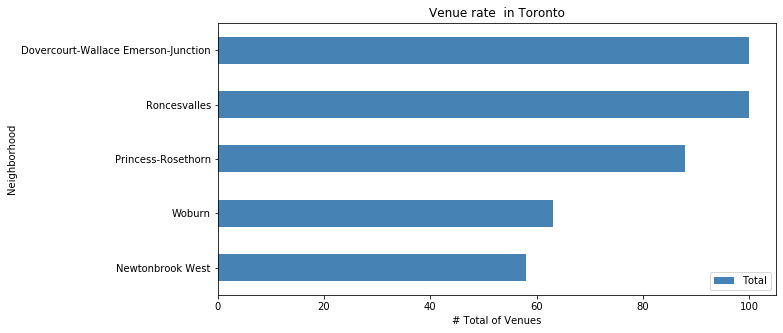

In [13]:
df_Top=mapTorontoPOI
df_Top.reset_index()
df_Top=df_Top.rename(columns={"Venue": "Total"})
df_Top=df_Top.sort_values(["Total"], ascending = (False))
df_Top=df_Top.head()
df_Top=df_Top.sort_values(["Total"], ascending = (True))
df_Top.plot(kind='barh', figsize=(10, 5), color='steelblue')
plt.xlabel('# Total of Venues')
plt.title('Venue rate  in Toronto')
plt.show()

In [14]:
#

# one hot encoding
canada_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
canada_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [canada_onehot.columns[-1]] + list(canada_onehot.columns[:-1])
canada_onehot = canada_onehot[fixed_columns]
canada_grouped = canada_onehot.groupby('Neighborhood').mean().reset_index()
canada_grouped.head()

Neighborhood  Yoga Studio  Acupuncturist  \
0               Agincourt North          0.0            0.0   
1  Agincourt South-Malvern West          0.0            0.0   
2             Banbury-Don Mills          0.0            0.0   
3                Bathurst Manor          0.0            0.0   
4           Bay Street Corridor          0.0            0.0   

   Afghan Restaurant  Airport  Airport Food Court  Airport Gate  \
0                0.0      0.0                 0.0           0.0   
1                0.0      0.0                 0.0           0.0   
2                0.0      0.0                 0.0           0.0   
3                0.0      0.0                 0.0           0.0   
4                0.0      0.0                 0.0           0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0                  0.0   
1             0.0              0.0               0.0                  0.0   
2             0.0              0.0               0.0                  0.0   
3             0.0              0.0               0.0                  0.0   
4             0.0              0.0               0.0                  0.0   

   Antique Shop  Arcade  Art Gallery  Art Museum  Arts & Crafts Store  \
0           0.0     0.0          0.0         0.0                  0.0   
1           0.0     0.0          0.0         0.0                  0.0   
2           0.0     0.0          0.0         0.0                  0.0   
3           0.0     0.0          0.0         0.0                  0.0   
4           0.0     0.0          0.0         0.0                  0.0   

   Asian Restaurant  Athletics & Sports  Auto Dealership  Auto Workshop  \
0               0.0                 0.0              0.0            0.0   
1               0.0                 0.0              0.0            0.0   
2               0.0                 0.0              0.0            0.0   
3               0.0                 0.0              0.0            0.0   
4               0.0                 0.0              0.0            0.0   

   Automotive Shop  BBQ Joint  Badminton Court  Bagel Shop  Bakery  ...  \
0              0.0        0.0              0.0         0.0  0.0000  ...   
1              0.0        0.0              0.0         0.0  0.0000  ...   
2              0.0        0.0              0.0         0.0  0.0000  ...   
3              0.0        0.0              0.0         0.0  0.0625  ...   
4              0.0        0.0              0.0         0.0  0.0000  ...   

   Tea Room  Thai Restaurant  Theater  Theme Park  Thrift / Vintage Store  \
0  0.000000              0.0   0.0000         0.0                     0.0   
1  0.000000              0.0   0.0000         0.0                     0.0   
2  0.111111              0.0   0.0000         0.0                     0.0   
3  0.000000              0.0   0.0625         0.0                     0.0   
4  0.000000              0.0   0.0000         0.0                     0.0   

   Tibetan Restaurant  Toy / Game Store  Track  Trail  Train Station  \
0                 0.0               0.0    0.0    0.0            0.0   
1                 0.0               0.0    0.0    0.0            0.0   
2                 0.0               0.0    0.0    0.0            0.0   
3                 0.0               0.0    0.0    0.0            0.0   
4                 0.0               0.0    0.0    0.0            0.0   

   Transportation Service  Travel & Transport  University  \
0                  0.0000                 0.0         0.0   
1                  0.0000                 0.0         0.0   
2                  0.0000                 0.0         0.0   
3                  0.0625                 0.0         0.0   
4                  0.0000                 0.0         0.0   

   Vegetarian / Vegan Restaurant  Video Game Store  Video Store  \
0                            0.0               0.0          0.0   
1                            0.0    

#### Function for sorting the Venues according to its frequency

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Sorting the Venues according to its frequency

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = canada_grouped['Neighborhood']

for ind in np.arange(canada_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(canada_grouped.iloc[ind, :], num_top_venues)


#### Now that we have a sorted list of venues for each of the top 5 neighborhood we can merge with our counter table, for final analysis.

In [17]:
#df_Top toronto_venues

df_Top=df_Top.merge(neighborhoods_venues_sorted, left_on='Neighborhood', right_on='Neighborhood')

df_Top=df_Top.sort_values(["Total"], ascending = (False))
df_Top=df_Top.set_index('Neighborhood')
display (df_Top)

Total   1st Most Common Venue  \
Neighborhood                                                         
Roncesvalles                           100                    Café   
Dovercourt-Wallace Emerson-Junction    100             Coffee Shop   
Princess-Rosethorn                      88                    Café   
Woburn                                  63  Furniture / Home Store   
Newtonbrook West                        58      Chinese Restaurant   

                                    2nd Most Common Venue  \
Neighborhood                                                
Roncesvalles                                          Bar   
Dovercourt-Wallace Emerson-Junction                  Café   
Princess-Rosethorn                                    Bar   
Woburn                                     Sandwich Place   
Newtonbrook West                             Dessert Shop   

                                    3rd Most Common Venue  \
Neighborhood                                                
Roncesvalles                                  Coffee Shop   
Dovercourt-Wallace Emerson-Junction                 Hotel   
Princess-Rosethorn                            Coffee Shop   
Woburn                                     Breakfast Spot   
Newtonbrook West                          Bubble Tea Shop   

                                    4th Most Common Venue  \
Neighborhood                                                
Roncesvalles                                   Restaurant   
Dovercourt-Wallace Emerson-Junction            Restaurant   
Princess-Rosethorn                                 Bakery   
Woburn                                        Coffee Shop   
Newtonbrook West                             Noodle House   

                                             5th Most Common Venue  \
Neighborhood                                                         
Roncesvalles                         Vegetarian / Vegan Restaurant   
Dovercourt-Wallace Emerson-Junction                           Park   
Princess-Rosethorn                                            Park   
Woburn                                        Fast Food Restaurant   
Newtonbrook West                               Japanese Restaurant   

                                    6th Most Common Venue  \
Neighborhood                                                
Roncesvalles                                 Cocktail Bar   
Dovercourt-Wallace Emerson-Junction      Sushi Restaurant   
Princess-Rosethorn                         Sandwich Place   
Woburn                                          Pet Store   
Newtonbrook West                            Shopping Mall   

                                      7th Most Common Venue  \
Neighborhood                                                  
Roncesvalles                            Japanese Restaurant   
Dovercourt-Wallace Emerson-Junction  Furniture / Home Store   
Princess-Rosethorn                                 Pharmacy   
Woburn                                           Restaurant   
Newtonbrook West                                     Bakery   

                                    8th Most Common Venue  \
Neighborhood                                                
Roncesvalles                                    Gift Shop   
Dovercourt-Wallace Emerson-Junction                 Plaza   
Princess-Rosethorn                                Brewery   
Woburn                                               Bank   
Newtonbrook West                                     Bank   

                                    9th Most Common Venue  \
Neighborhood                                                
Roncesvalles                            French Restaurant   
Dovercourt-Wallace Emerson-Junction               Theater   
Princess-Rosethorn                           Cocktail Bar   
Woburn                                        Men's Store   
Newtonbrook West                                     Café   

                                        10th 

## Question 2:
Using a data extraction tool, a CSV file was created from previous orders.
These orders will be a data set that will allow mapping a heat map for the city of Toronto in which shows the most common destinations for delivery home orders.

In [18]:
df_orders_reatil

Postal_code  Order_Amount        date
0                  Roselawn        776.97  2019-01-22
1                  Richmond        223.34  2019-08-21
2                     Rouge        655.44  2019-02-22
3     University of Toronto        299.80  2019-05-07
4           West Deane Park        644.27  2019-01-05
...                     ...           ...         ...
2994        York Mills West        726.04  2019-09-07
2995              Downsview        640.68  2019-08-08
2996     The Junction North        855.88  2019-03-17
2997               Dufferin        849.93  2019-06-09
2998        Montgomery Road        865.03  2020-01-25

[2999 rows x 3 columns]

In [19]:
#merged_df_orders_reatil=df_orders_reatil.merge(canada_zip_codes, left_on='zip_code', right_on='Postal code')
#merged_df_orders_reatil=merged_df_orders_reatil.drop(['zip_code'], axis=1)

merged_df_orders_reatil=df_orders_reatil
merged_df_orders_reatil['Order_Amount'] = merged_df_orders_reatil['Order_Amount'].astype(float)
merged_df_orders_reatil

Postal_code  Order_Amount        date
0                  Roselawn        776.97  2019-01-22
1                  Richmond        223.34  2019-08-21
2                     Rouge        655.44  2019-02-22
3     University of Toronto        299.80  2019-05-07
4           West Deane Park        644.27  2019-01-05
...                     ...           ...         ...
2994        York Mills West        726.04  2019-09-07
2995              Downsview        640.68  2019-08-08
2996     The Junction North        855.88  2019-03-17
2997               Dufferin        849.93  2019-06-09
2998        Montgomery Road        865.03  2020-01-25

[2999 rows x 3 columns]

In [20]:
#df_orders_maporders_map=df_orders_maporders_map.drop(['date','Postal code','Borough'], axis=1)
df_orders_maporders_map=merged_df_orders_reatil.rename(columns={"Postal_code": "Neighborhood"})
#df_orders_maporders_map=df_orders_maporders_map.reset_index()
df_orders_maporders_map

Neighborhood  Order_Amount        date
0                  Roselawn        776.97  2019-01-22
1                  Richmond        223.34  2019-08-21
2                     Rouge        655.44  2019-02-22
3     University of Toronto        299.80  2019-05-07
4           West Deane Park        644.27  2019-01-05
...                     ...           ...         ...
2994        York Mills West        726.04  2019-09-07
2995              Downsview        640.68  2019-08-08
2996     The Junction North        855.88  2019-03-17
2997               Dufferin        849.93  2019-06-09
2998        Montgomery Road        865.03  2020-01-25

[2999 rows x 3 columns]

In [21]:

df_orders_map_orders_byTotalmap=df_orders_maporders_map.groupby('Neighborhood').sum()

df_orders_maporders_map=df_orders_maporders_map.groupby('Neighborhood').count()
#df_orders_map_orders_byTotalmap['Neighborhood']=df_orders_map_orders_byTotalmap.index
df_orders_map_orders_byTotalmap=df_orders_map_orders_byTotalmap.reset_index()

df_orders_map_orders_byTotalmap

Neighborhood  Order_Amount
0            Adelaide      11059.86
1           Agincourt       9560.01
2     Agincourt North      11980.15
3      Albion Gardens       8142.11
4           Alderwood      11068.95
..                ...           ...
193  Woodbine Heights      11686.13
194         Yorkville      14583.14
195        York Mills      10895.42
196   York Mills West       7179.13
197   York University       9203.32

[198 rows x 2 columns]

In [22]:
df_orders_maporders_map=df_orders_maporders_map.rename(columns={"Order_Amount": "Order Counter"})
df_orders_maporders_map=df_orders_maporders_map.reset_index()
df_orders_maporders_map=df_orders_maporders_map.drop(['date'], axis=1)
df_orders_maporders_map


Neighborhood  Order Counter
0            Adelaide             19
1           Agincourt             16
2     Agincourt North             23
3      Albion Gardens             14
4           Alderwood             18
..                ...            ...
193  Woodbine Heights             19
194         Yorkville             24
195        York Mills             17
196   York Mills West             12
197   York University             15

[198 rows x 2 columns]

In [23]:
orders_map = folium.Map(location=[latitude, longitude],width='60%' ,height='60%',zoom_start=10)
orders_map.choropleth(
    geo_data=TO_Geo,
    data=df_orders_maporders_map,
    columns=['Neighborhood','Order Counter'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    line_color='black',
    fill_opacity=1, 
    line_opacity=0.4,
    legend_name='Total order request by Neighborhood '
)
orders_map

In [24]:
df_orders_maporders_map=df_orders_maporders_map.sort_values(["Order Counter"], ascending = (False))
#df_orders_maporders_map=df_orders_maporders_map.reset_index()
top_10_Neighborhood_df=df_orders_maporders_map.head(10)
#top_10_Neighborhood_df.index=top_10_Neighborhood_df['Neighborhood']
top_10_Neighborhood_df=top_10_Neighborhood_df.merge(df_orders_map_orders_byTotalmap, left_on='Neighborhood', right_on='Neighborhood')

top_10_Neighborhood_df

Neighborhood  Order Counter  Order_Amount
0            Downsview             52      36571.51
1           Willowdale             50      28702.31
2            Don Mills             34      20930.60
3            Runnymede             32      17959.40
4        North Midtown             30      17960.99
5       St. James Town             30      16873.72
6  Caledonia-Fairbanks             26      16206.90
7         Mount Dennis             24      16353.94
8            Yorkville             24      14583.14
9        Tam O'Shanter             24      14650.65

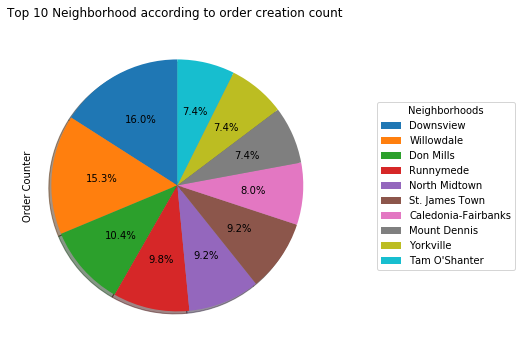

In [28]:
top_10_Neighborhood_df['Order Counter'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%',
                            startangle=90,    
                            labels=None,  
                            shadow=True,        
                            )

plt.title('Top 10 Neighborhood according to order creation count ')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(top_10_Neighborhood_df['Neighborhood'],
          title="Neighborhoods",
          loc="center left",
          bbox_to_anchor=(1.2, 0, 0.5, 1))

plt.show()

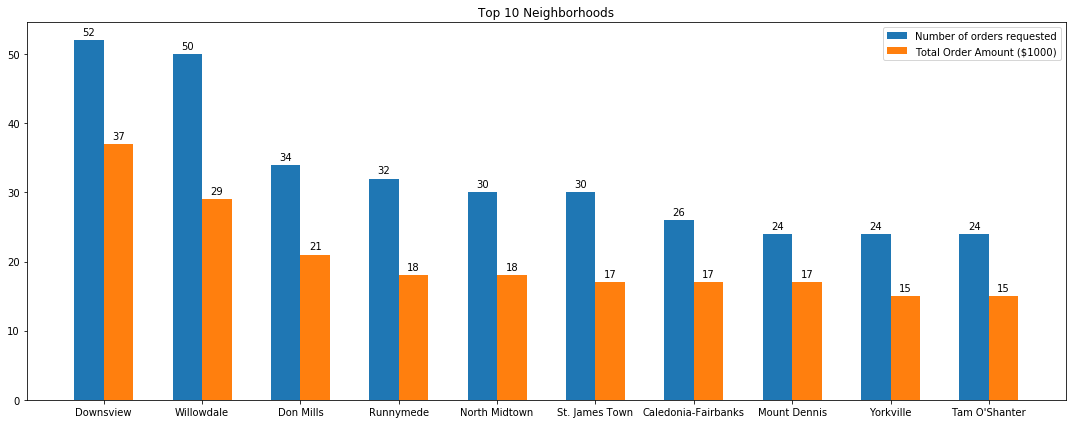

In [37]:
labels = top_10_Neighborhood_df['Neighborhood']
Order_Counter =top_10_Neighborhood_df['Order Counter']
Order_Amount =(top_10_Neighborhood_df['Order_Amount']/1000).apply(np.ceil).astype(int)

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar(x - width/2, Order_Counter, width, label='Number of orders requested')
rects2 = ax.bar(x + width/2, Order_Amount, width, label='Total Order Amount ($1000)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Top 10 Neighborhoods')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.autoscale(True,'y',False)
plt.show()


## Question 3 :
Using data from "Toronto Police Service Public Safety Data Portal" we can create an analyse a data set from Crime records.

In [38]:

!wget --quiet https://opendata.arcgis.com/datasets/af500b5abb7240399853b35a2362d0c0_0.geojson -O TorontoGeoPD.json
TO_Geo_PD = r'TorontoGeoPD.json' 

In [39]:
Neighbourhood_Crime_Rates_Boundary_File

OBJECTID            Neighbourhood  Hood_ID  Population  Assault_2014  \
0           1           Yonge-St.Clair       97       12528            20   
1           2  York University Heights       27       27593           271   
2           3         Lansing-Westgate       38       16164            44   
3           4       Yorkdale-Glen Park       31       14804           106   
4           5      Stonegate-Queensway       16       25051            88   
..        ...                      ...      ...         ...           ...   
135       136                 Milliken      130       26572            66   
136       137            Pleasant View       46       15818            34   
137       138                 Wychwood       94       14349            54   
138       139       Leaside-Bennington       56       16828            38   
139       140     Briar Hill-Belgravia      108       14257            65   

     Assault_2015  Assault_2016  Assault_2017  Assault_2018  Assault_2019  \
0              29            39            27            34            37   
1             296           361           344           357           370   
2              80            68            85            75            72   
3             136           174           161           175           209   
4              71            76            95            87            82   
..            ...           ...           ...           ...           ...   
135            92            88            80            78            99   
136            50            58            53            37            44   
137            76            86            55            76            74   
138            27            33            35            33            31   
139            81            64            70            84            78   

     Assault_AVG  Assault_CHG  Assault_Rate_2019  AutoTheft_2014  \
0           31.0         0.09              295.3               2   
1          333.2         0.04             1340.9             105   
2           70.7        -0.04              445.4              19   
3          160.2         0.19             1411.8              63   
4           83.2        -0.06              327.3              34   
..           ...          ...                ...             ...   
135         83.8         0.27              372.6              39   
136         46.0         0.19              278.2              12   
137         70.2        -0.03              515.7               5   
138         32.8        -0.06              184.2              10   
139         73.7        -0.07              547.1              14   

     AutoTheft_2015  AutoTheft_2016  AutoTheft_2017  AutoTheft_2018  \
0                 3               7               2               6   
1               100             105              92              92   
2                22              27              26              16   
3                53              41              52              63   
4                29              12              32              31   
..              ...             ...             ...             ...   
135              42              35              61              91   
136               7               8              17              13   
137              15              18              12              22   
138              14               4               5              44   
139              14              16              10              36   

     AutoTheft_2019  AutoTheft_AVG  AutoTheft_CHG  AutoTheft_Rate_2019  \
0                 6            4.3           0.00                 47.9   
1               144          106.3           0.57                521.9   
2                32           23.7           1.00                198.0   
3                61           55.5          -0.03                412.1   
4                34           28.7           0.10                135.7   
..              ...            ...       

In [51]:
crime_map = folium.Map(location=[latitude, longitude],width='100%' ,height='80%',zoom_start=10)
crime_map.choropleth(
    geo_data=TO_Geo_PD,
    data=Neighbourhood_Crime_Rates_Boundary_File,
    columns=['Neighbourhood','Population'],
    key_on='feature.properties.Neighbourhood',
    fill_color='PuBu',
    line_color='black',
    fill_opacity=1, 
    line_opacity=0.4,
    legend_name='Population by Neighborhood '
)
crime_map

## The One Million Question: 

### Where it would be the best place to place our new Physical Store?

# Results and Discussion section <a name="Results"></a>

# Conclusion Section <a name="Conclusion"></a>

# Thank You  - Muchas Gracias - Muito Obrigado